In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/FYP/2_Demo"

/content/drive/MyDrive/FYP/2_Demo


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
original_img = cv2.imread('/content/drive/MyDrive/FYP/2_Demo/ref_1.jpg')
cvtimage =cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
# plt.imshow(cvtimage)

gray_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
(thresh, img_bin) = cv2.threshold(gray_img, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

img_bin = 255-img_bin

kernel_length = np.array(original_img).shape[1]//80
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length)) #detect all the verticle lines - EROSION
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1)) #to detect all the horizontal lines - DILATION
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3) )

img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)

img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)

alpha = 0.5
beta = 1.0 - alpha
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [ ]:
def sort_contours(cnts, method="left-to-right"):
	reverse = False
	i = 0
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1

	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	return (cnts, boundingBoxes)

def get_closest_63_indices(lst):
    sorted_lst = sorted(enumerate(lst), key=lambda x: x[1])
    best_diff = float('inf')
    best_slice = []
    for i in range(len(sorted_lst)-62):
        slice_diff = sorted_lst[i+62][1] - sorted_lst[i][1]
        if slice_diff < best_diff:
            best_diff = slice_diff
            best_slice = sorted_lst[i:i+63]
    return sorted([x[0] for x in best_slice])

def get_area(contours):
    x, y, w, h = cv2.boundingRect(contours)
    a= cv2.contourArea(contours)
    area = np.array(a).astype(int).tolist()
    return w, y, w, h, area

def get_bounding_rects(indices, bounding_rects):
    return [bounding_rects[i] for i in indices]

In [ ]:
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in contours]

areaList =[]
boxes=[]

for c in contours:
    gblist = get_area(c)
    areaList.append(gblist[4])
    dList = get_closest_63_indices(areaList)
ggList = get_bounding_rects(dList, boundingBoxes)

for x, y, w, h in ggList:
    # print("x:", x, "y:", y, "w:", w, "h:", h)
    ime = cv2.rectangle(cvtimage,(x,y),(x+w,y+h),(0,255,0),6)
    boxes.append([x,y,w,h])

# plotting = plt.imshow(ime,cmap='gray')
# plt.title("Identified contours")
# plt.show()

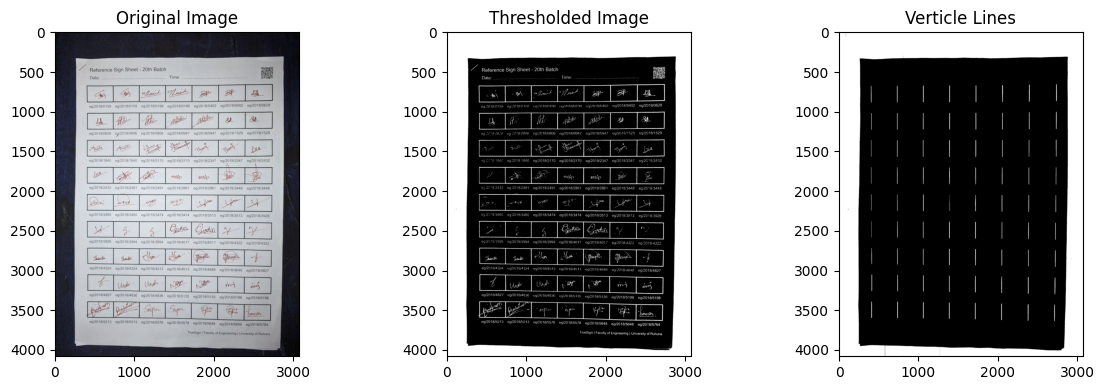

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
# cvtimage =cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
axes[0].imshow(original_img, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(img_bin, cmap='gray')
axes[1].set_title('Thresholded Image')

axes[2].imshow(verticle_lines_img, cmap='gray')
axes[2].set_title('Verticle Lines')

plt.tight_layout()
plt.show()

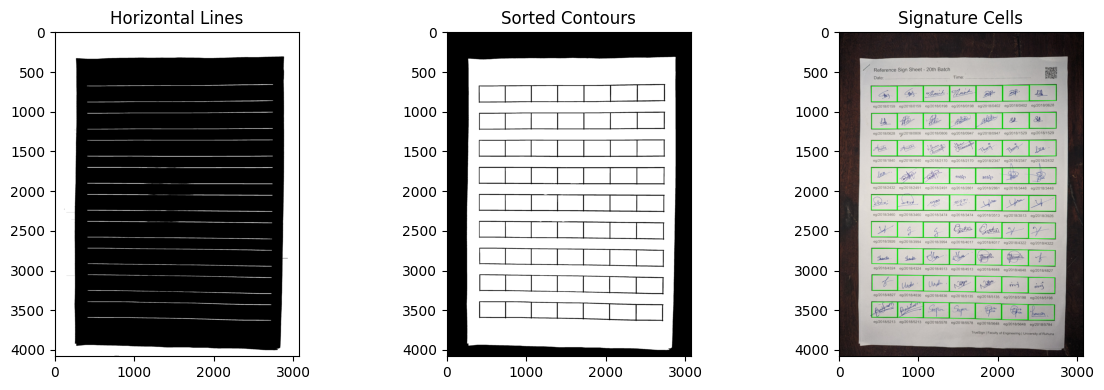

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].imshow(horizontal_lines_img, cmap='gray')
axes[0].set_title('Horizontal Lines')

axes[1].imshow(img_final_bin, cmap='gray')
axes[1].set_title('Sorted Contours')

axes[2].imshow(ime, cmap='gray')
axes[2].set_title('Signature Cells')
plt.tight_layout()
plt.show()

In [ ]:
import os

if not os.path.exists('cropped_images'):
    os.makedirs('cropped_images')

In [ ]:
# these constants must be centralized in the application
MAX_ROWS = 9
MAX_COLS = 7

GRID = [[0 for x in range(MAX_COLS)] for y in range(MAX_ROWS)]
exp1 = sorted(ggList, key=lambda r: (r[0]))
print(exp1)

def fn(n):
  c1 = exp1[MAX_ROWS * n:MAX_ROWS * (n + 1)]
  c11 = sorted(c1, key=lambda r: r[1])
  for i, c in enumerate(c11):
    GRID[i][n] = c

for n in range(MAX_COLS):
  fn(n)

print(GRID)


[(409, 683, 320, 194), (410, 2051, 320, 189), (410, 1710, 319, 190), (410, 1368, 319, 190), (411, 2390, 321, 189), (413, 1027, 316, 192), (415, 2727, 317, 190), (416, 3401, 316, 189), (419, 3061, 314, 190), (738, 2053, 319, 189), (738, 1711, 318, 190), (738, 681, 318, 195), (739, 1366, 316, 192), (739, 1024, 317, 194), (740, 2392, 316, 192), (741, 2729, 315, 192), (743, 3065, 314, 192), (744, 3402, 312, 192), (1065, 1366, 321, 194), (1066, 2734, 318, 190), (1066, 2395, 319, 191), (1066, 1024, 321, 192), (1067, 1713, 319, 194), (1067, 679, 320, 195), (1068, 3407, 315, 191), (1068, 3069, 316, 194), (1068, 2054, 318, 189), (1395, 3413, 315, 191), (1395, 3073, 317, 196), (1396, 2737, 317, 191), (1397, 2395, 316, 193), (1398, 2050, 315, 195), (1398, 1715, 317, 194), (1398, 1367, 319, 193), (1398, 1024, 320, 192), (1399, 679, 320, 195), (1722, 3417, 319, 197), (1723, 3077, 321, 199), (1724, 2740, 322, 193), (1725, 2398, 322, 195), (1725, 2058, 323, 190), (1726, 1715, 324, 190), (1728, 1367, 

In [ ]:
def crop_show(x, y, w, h):
  print(x,y,w,h)
  cvtimage =cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
  cropped = cvtimage[y:y+h, x:x+w]
  plt.imshow(cropped)
  plt.show()

for row in GRID:
  for cell in row:
    x, y, w, h = cell
    crop_show(x, y, w, h)

In [ ]:
def crop_show_folder(x, y, w, h, index):
    cropped = original_img[y:y+h, x:x+w]

    if cropped.size > 0:
        filename = f'cropped_images/cropped_{n}.png'
        cv2.imwrite(filename, cropped)

n = 1
for row in GRID:
    for cell in row:
        x, y, w, h = cell
        crop_show_folder(x, y, w, h, n)
        n += 1
